In [1]:
import warnings; warnings.simplefilter('ignore')
import nltk

!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger
!wget -P data/ https://raw.githubusercontent.com/muchlisp01/Project-UAS-KapSel-kelompok-1/main/data/banjir.json

!pip install spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
!pip install unidecode twython tweepy beautifulsoup4 tika pyLDAvis
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm

nltk.download('popular')

--2021-12-13 14:41:47--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16713 (16K) [text/plain]
Saving to: ‘taudataNlpTm.py’

taudataNlpTm.py     100%[===================>]  16.32K  --.-KB/s    in 0s      

2021-12-13 14:41:48 (102 MB/s) - ‘taudataNlpTm.py’ saved [16713/16713]

--2021-12-13 14:41:48--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20088 (20K) [

     |████████████████████████████████| 12.0 MB 19.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 3.7 MB 10.9 MB/s 
  Created wheel for xx-ent-wiki-sm: filename=xx_ent_wiki_sm-2.2.0-py3-none-any.whl size=3732134 sha256=d1668ca1abb9199af8d3979c906dd2cfdca336fc4cd148e031aad9e0a4bfc3c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-xlt_xgin/wheels/87/31/20/7f7576bcd0b6ee9c7056c60e28d9e6a40143c553cb5fecc9e2
Successfully built xx-ent-wiki-sm
✔ Download and installation successful
You can now load the model via spacy.load('xx_ent_wiki_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/xx_ent_wiki_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/xx
You can now load the model via spacy.load('xx

True

In [2]:
import warnings; warnings.simplefilter('ignore')
import taudataNlpTm as tau, itertools, re, pickle, pyLDAvis.gensim_models, pyLDAvis.sklearn, spacy, urllib.request, tweepy 
import urllib.request, requests, nltk, json 
import time, numpy as np, matplotlib.pyplot as plt, networkx as nx, pandas as pd, seaborn as sns, networkx as nx 
from matplotlib.colors import ListedColormap
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tag import CRFTagger
from gensim.models import Phrases
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from gensim.models import Word2Vec, FastText
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize
from spacy.lang.id import Indonesian
from html import unescape
from unidecode import unidecode
from nltk.tokenize import TweetTokenizer; Tokenizer = TweetTokenizer(reduce_len=True)
from nltk.stem import PorterStemmer;ps = PorterStemmer()
from string import punctuation
from textblob import TextBlob



pyLDAvis.enable_notebook()
sns.set(style="ticks", color_codes=True)
random_state = 99

'Done'

'Done'

In [3]:
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [4]:
T = loadTweets(file='data/banjir.json')
len(T)

11048

In [ ]:
T[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Dec 11 23:46:35 +0000 2021',
 'display_text_range': [0, 148],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 147063992,
    'id_str': '147063992',
    'indices': [3, 16],
    'name': 'tatak ujiyati',
    'screen_name': 'tatakujiyati'}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'RT @tatakujiyati: Mengendalikan banjir cuma dg sumur resapan? NO. Anies &amp; jajarannya di Pemprov DKI juga melakukan pengerukan &amp; membersihka…',
 'geo': None,
 'id': 1469815909258649601,
 'id_str': '1469815909258649601',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'in',
 'metadata': {'iso_language_code': 'in', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 873,
 'retweeted': False,
 'retweeted_status': {'contributors'

In [5]:
text = [t['full_text'] for t in T]
stops, lemmatizer = tau.LoadStopWords(lang='id')
stops.add('rt'); stops.add('jadi'); stops.add('untuk'); stops.add('no')
for i,d in tqdm(enumerate(text)):
    text[i] = tau.cleanText(d, lemma=lemmatizer, stops = stops, symbols_remove = True, min_charLen = 2)
    

11048it [00:13, 803.52it/s]


In [6]:
text[90]

'markonah_003 jualan narasi buzzerp nkri      radikal           sumur te ..'

## Menyimpan Hasil Cleaning

In [7]:
def saveTweets(tweets, file='Tweets.txt'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [8]:
fileName = 'data/BanjirCleanText.txt'
saveTweets(text, file=fileName)
print('Saved to '+fileName)

Saved to data/BanjirCleanText.txt


In [ ]:
banjir = pd.DataFrame([[t['created_at'],t['full_text'],t['user']['name'],t['user']['screen_name'],t['user']['protected'],t['user']['verified']
                      ,t['retweet_count'],t['favorite_count'],t['user']['favourites_count'],t['user']['followers_count']] for t in T])

In [ ]:
banjir.columns = ['created_at', 'full_text', 'user_name',
                'screen_name', 'protected', 'verified',
                'retweet_count','favorite_count','favourites_count',
                'followers_count']

banjir.head(5)

,created_at,full_text,user_name,screen_name,protected,verified,retweet_count,favorite_count,favourites_count,followers_count
0,Sat Dec 11 23:46:35 +0000 2021,RT @tatakujiyati: Mengendalikan banjir cuma dg...,Kopidingin203,YanzKOPIdingin,False,False,873,0,23215,816
1,Sat Dec 11 23:46:31 +0000 2021,RT @andikceritanya: ^thread^\n\nTahukah kamu b...,Yuli Astuti,yuliastuti8721,False,False,10,0,7446,2039
2,Sat Dec 11 23:46:09 +0000 2021,RT @Markonah_003: Jualan Narasi Buzzerp NKRI:\...,zul_piliank🇮🇩🇵🇸🇮🇩,zul_piliank02,False,False,105,0,12871,2727
3,Sat Dec 11 23:45:50 +0000 2021,"@hhhocuspocus Halo, saya Bencana Bot. Untuk me...",PetaBencana.id,petabencana,False,True,0,0,1751,129725
4,Sat Dec 11 23:44:45 +0000 2021,RT @Rosebybubu: Sticker era banjir bgt wkwk st...,sit🦋,rrjsoong,False,False,351,0,14608,951


In [ ]:
print(banjir.shape)
banjir.duplicated().sum()

(11048, 10)


0

# Visualisasi menggunakan voyant

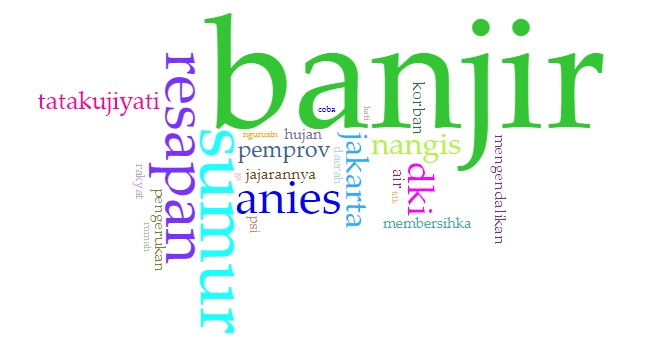

Dari wordcloud diatas, terdapat 25 kata paling sering muncul, semakin besar ukuran hurufnya maka semakin sering kata tersebut muncul dalam data.

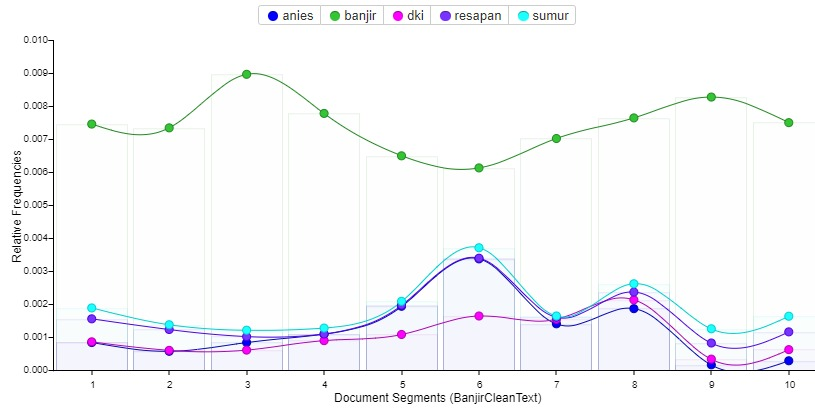

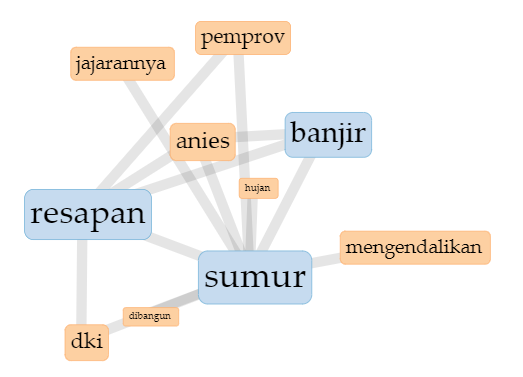

dari gambar diatas bisa kita ambil kesimpulan bahwa pemprov DKI Jakarta berusaha mengatasi banjir dengan membangun sumur resapan untuk menampung air hujan

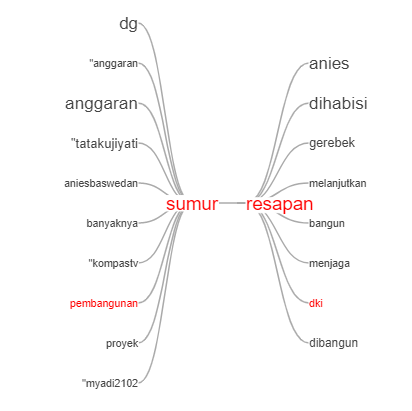

dari gambar diatas bisa kita simpulkan bahwa salah satu topik yang paling sering dibicarakan adalah tentang pembangunan sumur resapan di DKI Jakarta

# Variabel Selection

In [ ]:
data_num = banjir.select_dtypes(include =['float64','int64'])
data_num.head(5)

,retweet_count,favorite_count,favourites_count,followers_count
0,873,0,23215,816
1,10,0,7446,2039
2,105,0,12871,2727
3,0,0,1751,129725
4,351,0,14608,951


In [ ]:
data_cat = banjir.select_dtypes(include = ['object'])
data_cat.head(5)

,created_at,full_text,user_name,screen_name
0,Sat Dec 11 23:46:35 +0000 2021,RT @tatakujiyati: Mengendalikan banjir cuma dg...,Kopidingin203,YanzKOPIdingin
1,Sat Dec 11 23:46:31 +0000 2021,RT @andikceritanya: ^thread^\n\nTahukah kamu b...,Yuli Astuti,yuliastuti8721
2,Sat Dec 11 23:46:09 +0000 2021,RT @Markonah_003: Jualan Narasi Buzzerp NKRI:\...,zul_piliank🇮🇩🇵🇸🇮🇩,zul_piliank02
3,Sat Dec 11 23:45:50 +0000 2021,"@hhhocuspocus Halo, saya Bencana Bot. Untuk me...",PetaBencana.id,petabencana
4,Sat Dec 11 23:44:45 +0000 2021,RT @Rosebybubu: Sticker era banjir bgt wkwk st...,sit🦋,rrjsoong


In [ ]:
print(banjir.isnull().sum())

created_at          0
full_text           0
user_name           0
screen_name         0
protected           0
verified            0
retweet_count       0
favorite_count      0
favourites_count    0
followers_count     0
dtype: int64


# FAVOURITE COUNT TERBANYAK


In [ ]:
banjir.sort_values(by=['favorite_count'], ascending=False).head(1)

,created_at,full_text,user_name,screen_name,protected,verified,retweet_count,favorite_count,favourites_count,followers_count
7266,Sat Dec 11 03:38:55 +0000 2021,PSI tdk akan menjadi besar hanya ngurusin Anni...,Ali Syarief,alisyarief,False,False,591,3196,69246,39219


# RETWEET TERBANYAK

In [ ]:
banjir.sort_values(by=['retweet_count'], ascending=False).head(1)

,created_at,full_text,user_name,screen_name,protected,verified,retweet_count,favorite_count,favourites_count,followers_count
8398,Sat Dec 11 00:33:46 +0000 2021,RT @tampuboIon: hari ini ada mas gojek yang re...,️️ ️️️🌸ima🌸 | jualan dimsum ayam guys,haefiza861015,False,False,29350,0,10595,1319


# FAVOURITES COUNT TERBANYAK

In [ ]:
banjir.sort_values(by=['favourites_count'], ascending=False).head(1)

,created_at,full_text,user_name,screen_name,protected,verified,retweet_count,favorite_count,favourites_count,followers_count
4693,Sat Dec 11 08:18:20 +0000 2021,RT @Sahabat_Bangsa: Ulang Tahun pada 10 Desemb...,Zara 🐪,zarazettirazr,False,False,11,0,918374,346407


# FOLLOWERS COUNT TERBANYAK

In [ ]:
banjir.sort_values(by=['favourites_count'], ascending=False).head(1)

,created_at,full_text,user_name,screen_name,protected,verified,retweet_count,favorite_count,favourites_count,followers_count
4693,Sat Dec 11 08:18:20 +0000 2021,RT @Sahabat_Bangsa: Ulang Tahun pada 10 Desemb...,Zara 🐪,zarazettirazr,False,False,11,0,918374,346407


In [ ]:
from datetime import date, time, datetime, timedelta

In [ ]:
waktu = pd.to_datetime(banjir['created_at'])

In [ ]:
waktu

0       2021-12-11 23:46:35+00:00
1       2021-12-11 23:46:31+00:00
2       2021-12-11 23:46:09+00:00
3       2021-12-11 23:45:50+00:00
4       2021-12-11 23:44:45+00:00
                   ...           
11043   2021-12-10 11:20:42+00:00
11044   2021-12-10 11:20:11+00:00
11045   2021-12-10 11:20:02+00:00
11046   2021-12-10 11:19:58+00:00
11047   2021-12-10 11:19:41+00:00
Name: created_at, Length: 11048, dtype: datetime64[ns, UTC]

In [ ]:
banjir_num = pd.concat([data_num, waktu], axis=1)
banjir_num.head(1)

,retweet_count,favorite_count,favourites_count,followers_count,created_at
0,873,0,23215,816,2021-12-11 23:46:35+00:00


# VISUALISASI WAKTU TERHADAP RETWEET COUNT

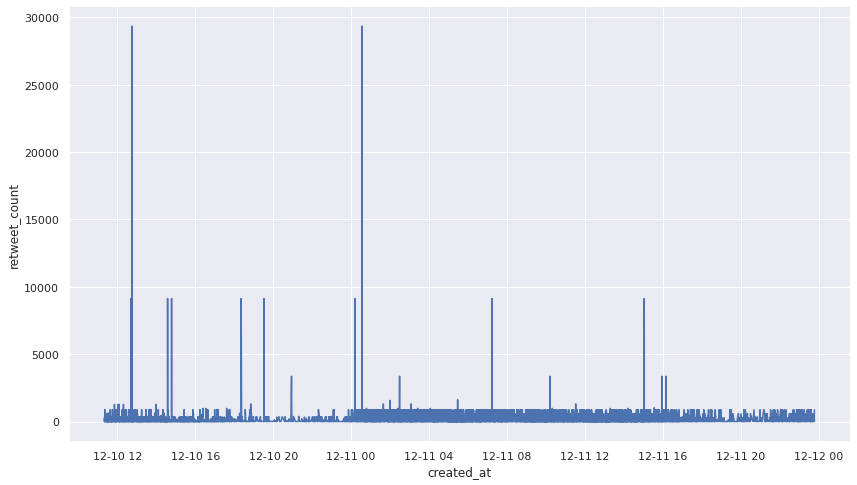

In [ ]:
sns.set(style="darkgrid")

plt.figure(figsize=(14, 8))
p = sns.lineplot(x='created_at', y='retweet_count', data=banjir_num)
plt.show()

dari gambar diatas dapat disimpulkan bahwa waktu dengan jumlah tweet terbanyak adalah pada tanggal 10 desember jam 12.00 dan 11 desember jam 00.00

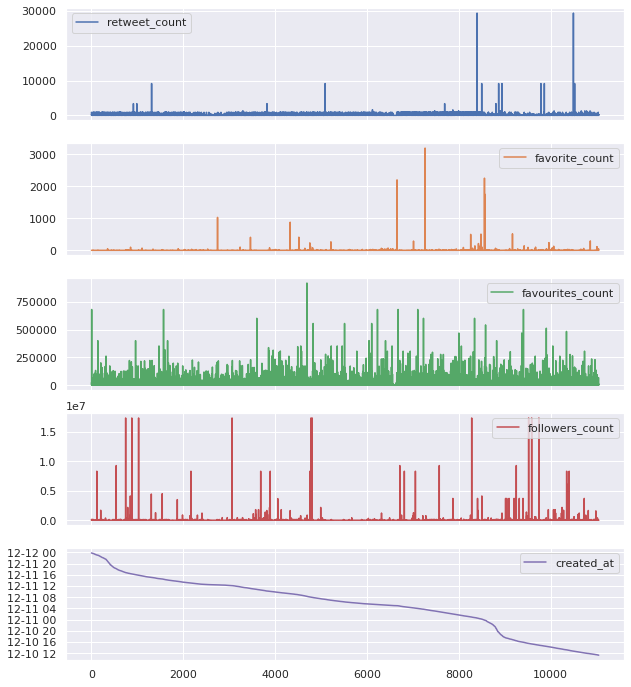

In [ ]:
p = banjir_num.plot(subplots=True, figsize=(10,12))

# TOPIC MODELING

## Pembentukan Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()

data = text.copy()
tf = tf_vectorizer.fit_transform(data)
tf_terms = tf_vectorizer.get_feature_names()

tf.shape

(11048, 14590)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 3 # Misal tidak di optimalkan terlebih dahulu
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)   
lda


LatentDirichletAllocation(n_components=3, random_state=0)

In [ ]:
#mengkompres 14590 kolom matriks menjadi 4 kolom matriks saja
vsm_topics = lda.transform(tf)
print(vsm_topics.shape)
vsm_topics

(11048, 3)


array([[0.02604251, 0.02597962, 0.94797786],
       [0.95911885, 0.02042373, 0.02045742],
       [0.81332248, 0.03801022, 0.1486673 ],
       ...,
       [0.78156469, 0.01790761, 0.2005277 ],
       [0.02337204, 0.95374199, 0.02288598],
       [0.01873917, 0.01866034, 0.96260049]])

In [ ]:
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] 
doc_topic[:10]

100%|██████████| 11048/11048 [00:00<00:00, 594336.97it/s]


[3, 1, 1, 1, 1, 3, 1, 2, 1, 1]

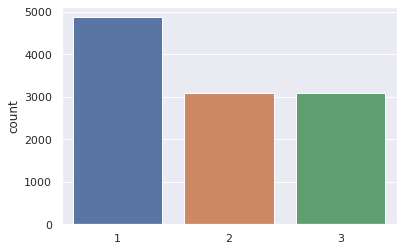

In [ ]:
# mari kita plot
plot = sns.countplot(doc_topic)

In [ ]:
Top_Words = 40
print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
tau.print_Topics(lda, tf_terms, n_topics, Top_Words)

Printing top 3 Topics, with top 40 Words:
Topic #1:
banjir nangis bgt air mata liat yg gue ya wkwk hujan aja era karna tl gak bencana ngeliat lagunya mv ngevote base udah sticker streaming 127 didrag sali rosebybubu ga banget kalo halo bot pas melaporkan silakan balas sekitarmu jalan
Topic #2:
banjir korban psi rakyat daerah yg jakarta hati tdk coba ngurusin mengambil alisyarief rumah annies majority kedaerah warga hujan lombok ga resapan sumur terdampak tenggelam kena dp balkon jatuh kader2 enggalpamukty tanah semoga utk berduka proyek ribuan kesusahan army dunia
Topic #3:
banjir sumur resapan anies dki tatakujiyati pemprov dg jajarannya mengendalikan pengerukan membersihka jakarta gagal total orang yg program kota gubernur dibangun salah jokowi mencegah mengatasi air pemerintah taman rusak menanggulangi utk genangan dipakai jalan momen menjabat gub win mengurangi baswedan


In [ ]:
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.136012  0.193574       1        1  39.475406
1     -0.111305 -0.206910       2        1  30.480060
2      0.247317  0.013337       3        1  30.044534, topic_info=             Term         Freq        Total Category  logprob  loglift
12752       sumur  2348.000000  2348.000000  Default  30.0000  30.0000
747         anies  1554.000000  1554.000000  Default  29.0000  29.0000
3659          dki  1297.000000  1297.000000  Default  28.0000  28.0000
11254     resapan  2038.000000  2038.000000  Default  27.0000  27.0000
10235     pemprov   867.000000   867.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
5970       jokowi   172.594377   283.730918   Topic3  -5.4924   0.7054
11558       salah   178.445999   343.984429   Topic3  -5.4590   0.5462
14464          yg   259.874348  1263.631697   Topic3  -5.0831  -0.3791
10219  pemerintah   146.503792   227.721914   Topic3  -5.6562   0.7614
438           air   150.865542   811.150625   Topic3  -5.6269  -0.4796

[166 rows x 6 columns], token_table=       Topic      Freq Term
term                       
41         1  0.997073  127
438        1  0.627504  air
438        2  0.186155  air
438        3  0.186155  air
449        1  0.902893  aja
...      ...       ...  ...
14373      2  0.222971   ya
14373      3  0.002027   ya
14464      1  0.341080   yg
14464      2  0.452664   yg
14464      3  0.205756   yg

[179 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

dari data yang kita dapatkan kita membentuk 3 cluster topik yang paling populer

# CENTRALITY ANALISYS

In [ ]:
import graphviz, warnings; warnings.simplefilter('ignore')
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx
import random, taudata_sna as tau
import json, re 
from graphviz import Digraph

seed = 123
random.seed(seed)
np.random.seed(seed)
"Done"

'Done'

In [ ]:
dataset = loadTweets(file='data/banjir.json')
len(dataset)

11048

In [ ]:
users=[t['user']['screen_name'] for t in dataset ]
tweets=[t['full_text'] for t in dataset]


In [ ]:
G = nx.Graph() # Graph Kosong Baru

G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  7868
Banyak Edges =  0


## Membentuk graf berdasarkan username yang paling sering di mention

In [ ]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  9754
Banyak Edges =  8866


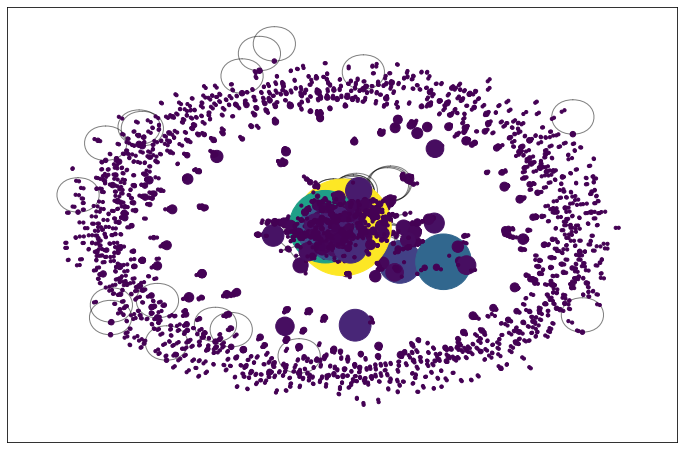

In [ ]:
# Draw the Tweet Graph
plt.subplots(figsize=(12,8))

d = nx.degree(G)
pos = nx.spring_layout(G, seed=seed) # Spring LayOut
D = [d[node]*10 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=D, node_color=D) # Gambar Vertex
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5) # Gambar edges
#nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

## Centrality Degree

In [ ]:
Gt = tau.Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['tatakujiyati', 'alisyarief', 'Rosebybubu', 'EnggalPamukty', 'BERKARYA', 'petabencana', 'Mdy', 'AREAJULID', 'aniesbaswedan', 'Pencerah']
Influencial Users Scores: [0.09576541 0.05393212 0.03168256 0.0261458  0.02460781 0.02224956
 0.02081411 0.01866092 0.0135343  0.01179124]


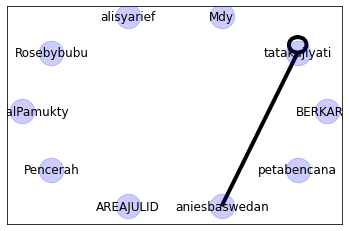

In [ ]:
tau.drawGraph(Gt, True, layOut='circular')

berdasarkan metode centrality degree didapatkan 2 username yang saling berhubungan yaitu aniesbaswedan dan tatakujiyati

## Closeness Centrality

In [ ]:
Gt = tau.Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['tatakujiyati', 'aniesbaswedan', 'alisyarief', 'madachiba', 'petabencana', 'Sjaechu', 'DKIJakarta', 'SantaPradana', 'mamiennie', 'viskaya']
Influencial Users Scores: [0.14525733 0.1367081  0.13528217 0.13345566 0.12970634 0.12927292
 0.12903502 0.12817263 0.1274012  0.12693274]


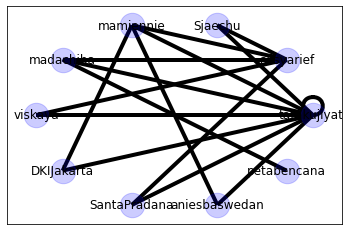

In [ ]:
tau.drawGraph(Gt, True, layOut='circular')

berdasarkan metode closeness centrality didapatkan username dengan jarak terkecil yaitu tatakujiyati. Artinya tweet dari username tersebut paling cepat untuk menjadi viral



## Eigen Centrality

In [ ]:
Gt = tau.Centrality(G, N=10, method='eigen', outliers=False, Label = True, layOut='spring')

Influencial Users: ['tatakujiyati', 'alisyarief', 'EnggalPamukty', 'BERKARYA', 'Mdy', 'aniesbaswedan', 'Markonah', 'SantaPradana', 'AgungAnggoroPut', 'AhmadBaron11']
Influencial Users Scores: [0.66642218 0.20051255 0.0878211  0.0776678  0.06425778 0.04409578
 0.03708773 0.03521392 0.03389955 0.03337472]


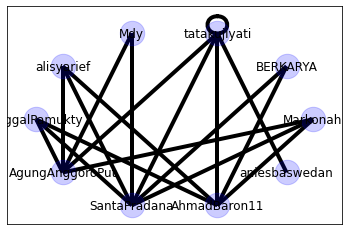

In [ ]:
tau.drawGraph(Gt, True, layOut='circular')

metode eigen centratility mencari username yang terhubung dengan orang yang penting atau berpengaruh. Dari data kita didapatkan username tatakujiyati terhubung dengan Anies Baswedan yang merupakan Gubernur DKI Jakarta, artinya tweet dari tatakujiyati akan banyak dilihat oleh follower dari Anies Baswedan

## Beetweeness Centrality

In [ ]:
Gt = tau.Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['tatakujiyati', 'petabencana', 'alisyarief', 'Rosebybubu', 'aniesbaswedan', 'txtdarigajelas', 'dsvoxg', 'AREAJULID', 'jampirojam', 'EnggalPamukty']
Influencial Users Scores: [0.1020945  0.07417251 0.05867246 0.0309566  0.02920583 0.02704788
 0.02645957 0.02195623 0.01869466 0.01627554]


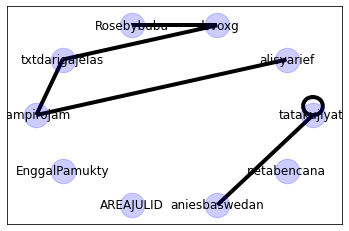

In [ ]:
tau.drawGraph(Gt, True, layOut='circular')

beetweeness centrality mencari pusat atau sumber utama dari suatu informasi. Nantinya username yang menjadi sumber ini bisa digunakan untuk menghentikan beredarnya suatu informasi dengan mencari tahu kepada siapa saja dia memberikan informasi tersebut dan menyuruhnya untuk menghentikannya.

dari gambar diatas terbentuk 2 kelompok yaitu kelompok username tatakujiyati dengan aniesbaswedan dan kelompok username Rosebybubu, dsvoxg, txtdarigajelas, jampirojam, alisyarief.